<b> What is this notebook? </b><br>

This notebook is for visualizing some of our data and digging into a couple features of our dataset.<br>
This notebook briefly looks into potential input features for the model.
<br>
(this notebook took 1.5 hours to run and create)

In [30]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import pearsonr, gaussian_kde
from sklearn.linear_model import LinearRegression

import sys
sys.path.append('../data')

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
mpl.rcParams['figure.dpi'] = 200

# Read in and Visualize the Data

In [3]:
achievement_percentages = pd.read_csv('../data/Achievement_Percentages.csv')
app_id_info = pd.read_csv('../data/App_ID_Info.csv')
friends = pd.read_csv('../data/friends.csv')
games_1 = pd.read_csv('../data/Games_1.csv')
games_2 = pd.read_csv('../data/Games_2.csv')
game_developers = pd.read_csv('../data/Games_Developers.csv')
game_genres = pd.read_csv('../data/Games_Genres.csv')
game_publishers = pd.read_csv('../data/Games_Publishers.csv')
groups = pd.read_csv('../data/Groups.csv')
player_summaries = pd.read_csv('../data/Player_Summaries.csv')

/Users/TrentWoodbury/Code/venv/steam_dataset/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
achievement_percentages.head()

,appid,Name,Percentage
0,50,ach0,0.091038
1,50,ach1,0.088308
2,50,ach2,0.088496
3,50,grp_ach0,0.010733
4,50,grp_ach1,0.010638


In [5]:
app_id_info.head()

,appid,Title,Type,Price,Release_Date,Rating,Required_Age,Is_Multiplayer
0,392230,Littlstar VR Cinema,game,0.0,1970-01-01 00:00:00 UTC,-1,0,0
1,440000,Portal 2: Exhumaos,mod,0.0,1970-01-01 00:00:00 UTC,-1,0,0
2,23480,Ceville Demo,demo,0.0,1970-01-01 00:00:00 UTC,-1,0,0
3,3432,Pizza Frenzy Deluxe Free Demo,demo,0.0,1970-01-01 00:00:00 UTC,-1,0,0
4,428230,Swift,game,0.0,1970-01-01 00:00:00 UTC,-1,0,1


In [6]:
friends.head()

,steamid_a,steamid_b,friend_since,dateretrieved
0,76561198081638400,76561198061647456,2013-02-22 05:24:36 UTC,2013-09-24 13:31:25 UTC
1,76561198081638400,76561198050245657,2013-01-23 13:04:35 UTC,2013-09-24 13:31:25 UTC
2,76561198001291264,76561198009238138,2009-12-07 09:55:10 UTC,2013-06-09 01:01:03 UTC
3,76561197989101568,76561198031884772,2012-05-06 13:18:45 UTC,2013-07-18 01:36:51 UTC
4,76561197989101568,76561198085268255,2013-10-11 14:05:12 UTC,2013-10-24 23:24:37 UTC


In [7]:
games_1.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved
0,76561198001291264,8870,NaN,1392.0,2013-06-09 01:01:03 UTC
1,76561198001291264,400,NaN,239.0,2013-06-09 01:01:03 UTC
2,76561198001291264,212910,NaN,130.0,2013-06-09 01:01:03 UTC
3,76561198001291264,550,NaN,17547.0,2013-06-09 01:01:03 UTC
4,76561198001291264,420,NaN,534.0,2013-06-09 01:01:03 UTC


In [8]:
games_2.head()

,steamid,appid,playtime_2weeks,playtime_forever,dateretrieved
0,76561197973546950,70,NaN,86,2014-08-16 18:25:37 UTC
1,76561197973532552,65610,NaN,7,2014-08-16 18:26:49 UTC
2,76561197973497160,280,NaN,731,2014-08-16 18:28:36 UTC
3,76561197973529600,26800,NaN,39,2014-08-16 18:28:52 UTC
4,76561197973529600,49540,NaN,95,2014-08-16 18:28:52 UTC


In [9]:
games_1.shape

(628117, 5)

In [10]:
games_2.shape

(1200557, 5)

In [11]:
game_developers.head()

,appid,Developer
0,462530,8i
1,452420,M2
2,466530,M2
3,366960,UD
4,315060,2SD


In [12]:
game_genres.head()

,appid,Genre
0,7290,RPG
1,8980,RPG
2,18010,RPG
3,18040,RPG
4,24447,RPG


In [13]:
game_publishers.head()

,appid,Publisher
0,207990,NaN
1,215220,NaN
2,220824,NaN
3,241600,NaN
4,249310,NaN


In [14]:
groups.head()

,steamid,groupid,dateretrieved
0,76561198079301664,2787047,2013-10-03 11:58:56 UTC
1,76561198079301664,5358,2013-10-03 11:58:56 UTC
2,76561198079301664,440319,2013-10-03 11:58:56 UTC
3,76561197974107716,36457,2013-05-14 14:02:40 UTC
4,76561197974107716,1835884,2013-05-14 14:02:40 UTC


In [15]:
player_summaries.head()

,steamid,personaname,profileurl,avatar,avatarmedium,avatarfull,personastate,communityvisibilitystate,profilestate,lastlogoff,...,primaryclanid,timecreated,gameid,gameserverip,gameextrainfo,cityid,loccountrycode,locstatecode,loccityid,dateretrieved
0,76561198024350932,DGJarski,http://steamcommunity.com/profiles/76561198024...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,1,1.0,2011-12-07 02:31:52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-08 01:48:13
1,76561197972375740,Kregger,http://steamcommunity.com/profiles/76561197972...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,1,1.0,2013-02-18 03:53:19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-28 14:38:19
2,76561197972581736,3ulle+ C@+cher,http://steamcommunity.com/profiles/76561197972...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,3,1.0,2011-08-29 18:36:52,...,1.035828e+17,2004-12-29 09:00:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-28 14:38:22
3,76561198027776732,ÐºÐ°Â®Ð»Â©Ð¾Ð½Â©,http://steamcommunity.com/profiles/76561198027...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,1,1.0,2010-11-23 08:13:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-08 14:45:09
4,76561198080962334,Djcs124,http://steamcommunity.com/id/djcs124/,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,http://media.steampowered.com/steamcommunity/p...,0,3,1.0,2013-03-14 16:37:21,...,1.035828e+17,2013-01-08 13:54:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-14 23:02:27


# EDA

I want to make a model to predict how long a game player will play a given game. Let's also assume that we are only predicting for games for which the player is assured to player. This could, e.g. be a proxy for games that the player has just purchased.<br><br>

Let's start digging into what variables are predictive for this.<br><br>

In this section I outline the general EDA process I tend to go through for two variables. For the remainder of the variables, I am just going to throw them into the model and we can determine if they are useful via a feature importance method such as permutation importance.

## Game Rating

I hypothesize that there is a positive correlation between a game's rating and the length of time that it will be played by each user.<br><br>
First, let's look at the general distribution of game reviews.

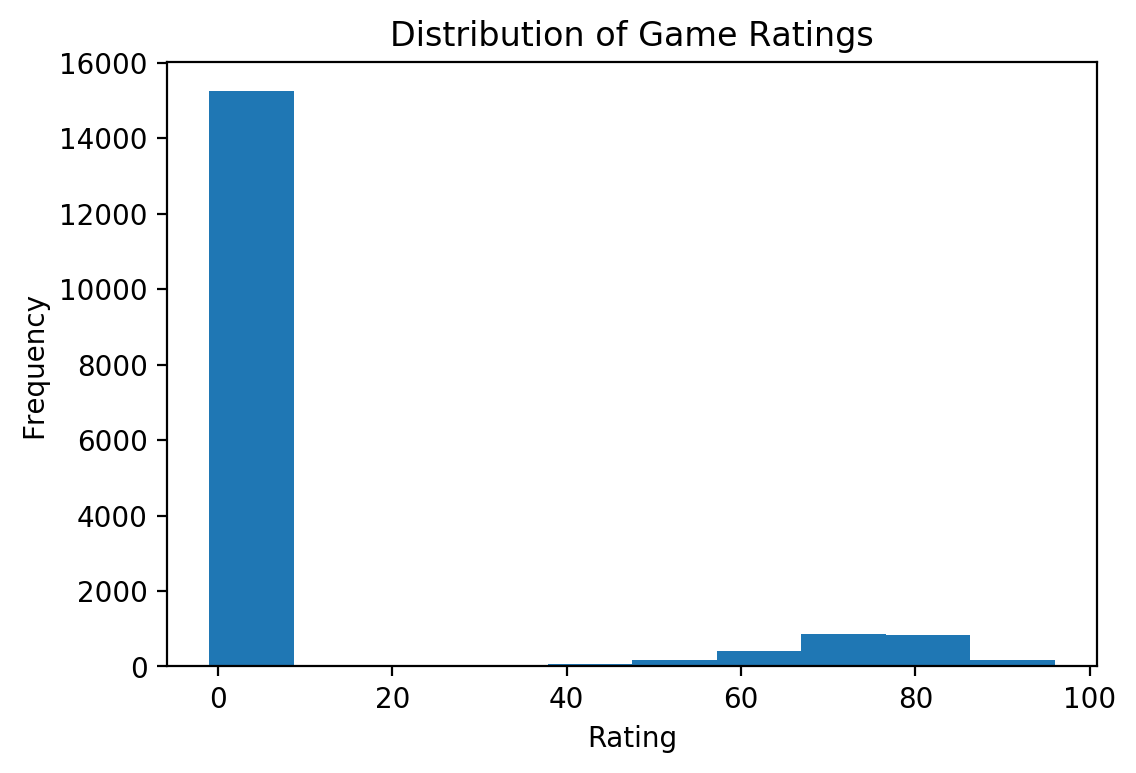

In [16]:
plt.hist(app_id_info.Rating)
plt.title("Distribution of Game Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

There are a ton of games with a rating of -1, meaning <b>Not Applicable</b>. <br>
Let's filter those out for this analysis.

In [17]:
filtered_apps = app_id_info.loc[app_id_info.Rating > 0, :]
all_games = pd.concat((games_1, games_2), axis=0)
playtime_ratings = all_games.merge(filtered_apps, on='appid', how='inner')
# group by each user to get the max playtime for a game (since playtime_forever is a cumulative sum)
playtime_ratings = (
    playtime_ratings
    .loc[:, ['steamid', 'appid', 'Rating', 'playtime_forever']]
    .groupby(['steamid', 'appid'])
    .max()
    .reset_index()
)

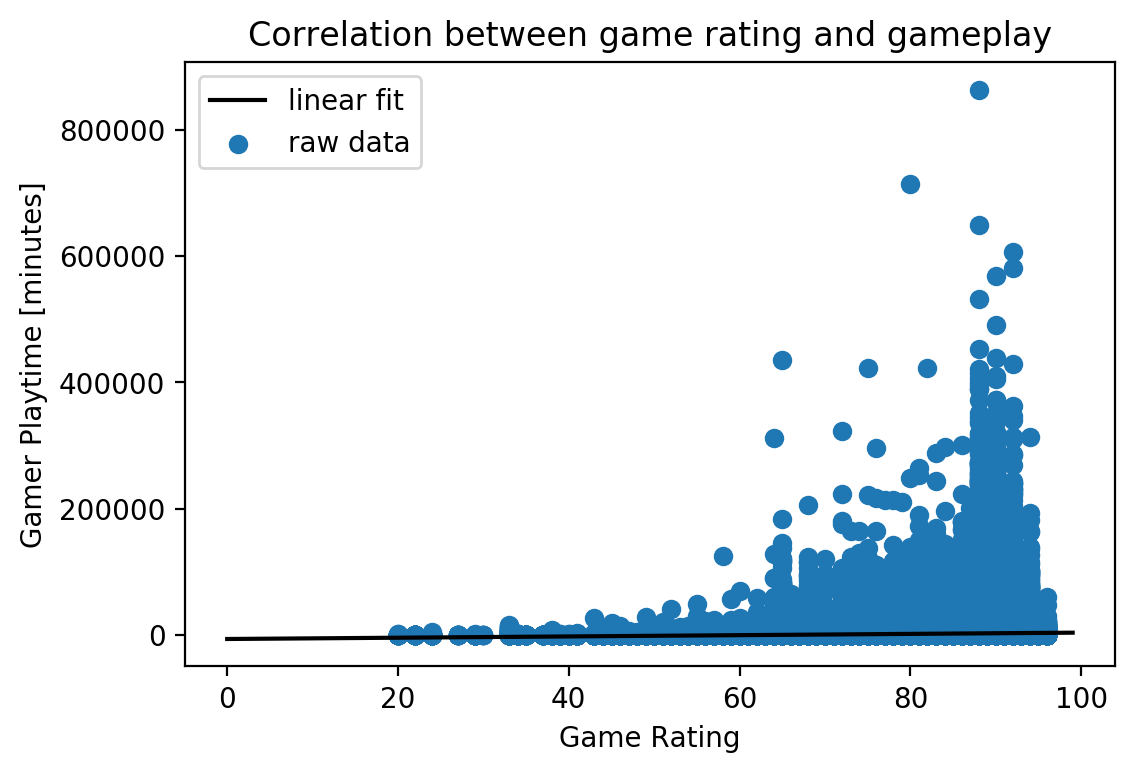

In [18]:
lr = LinearRegression()
lr.fit(playtime_ratings['Rating'].values.reshape(-1,1), playtime_ratings['playtime_forever'])
best_fit_line = lr.predict(np.arange(100).reshape(-1,1))
plt.scatter(playtime_ratings['Rating'], playtime_ratings['playtime_forever'], label='raw data')
plt.plot(range(100), best_fit_line, label='linear fit', c='k')
plt.xlabel("Game Rating")
plt.ylabel("Gamer Playtime [minutes]")
plt.title("Correlation between game rating and gameplay")
plt.legend()
plt.show()

In [19]:
print("Correlation between rating and gameplay:", pearsonr(playtime_ratings['Rating'].values, playtime_ratings['playtime_forever']))

Correlation between rating and gameplay: (0.1036662340157137, 0.0)


There is a weak positive correlation between game rating and playtime.

## Game Genre

Do some game types tend to have a higher average playtime than others? If that is the case, then we can think of the game type as a Bayesian prior that we can plug into our model.

In [20]:
print("Game Genres:", set(game_genres.Genre.values))

Game Genres: {'Free to Play', 'Action', 'Adventure', 'Racing', 'Education', 'Strategy', 'RPG', 'Audio Production', 'Design & Illustration', 'Casual', 'Animation & Modeling', 'Early Access', 'Video Production', 'Simulation', 'Massively Multiplayer', 'Utilities', 'Web Publishing', 'Indie', 'Accounting', 'Photo Editing', 'Sports', 'Software Training'}


Now let's look at the distribution of playtime for the different genres.

In [21]:
genre_playtimes = game_genres.merge(all_games, on='appid', how='inner')

# Now let's group by user and appid to get the max playtime_forever
genre_playtimes = (
    genre_playtimes
    .loc[:, ['appid', 'Genre', 'steamid', 'playtime_forever']]
    .groupby(['appid', 'steamid'])
    .max()
    .reset_index()
)

In [22]:
genre_playtimes.head()

,appid,steamid,Genre,playtime_forever
0,10,76561197971837094,Action,0.0
1,10,76561197971837848,Action,0.0
2,10,76561197971838122,Action,95.0
3,10,76561197971838464,Action,1398.0
4,10,76561197971838788,Action,0.0


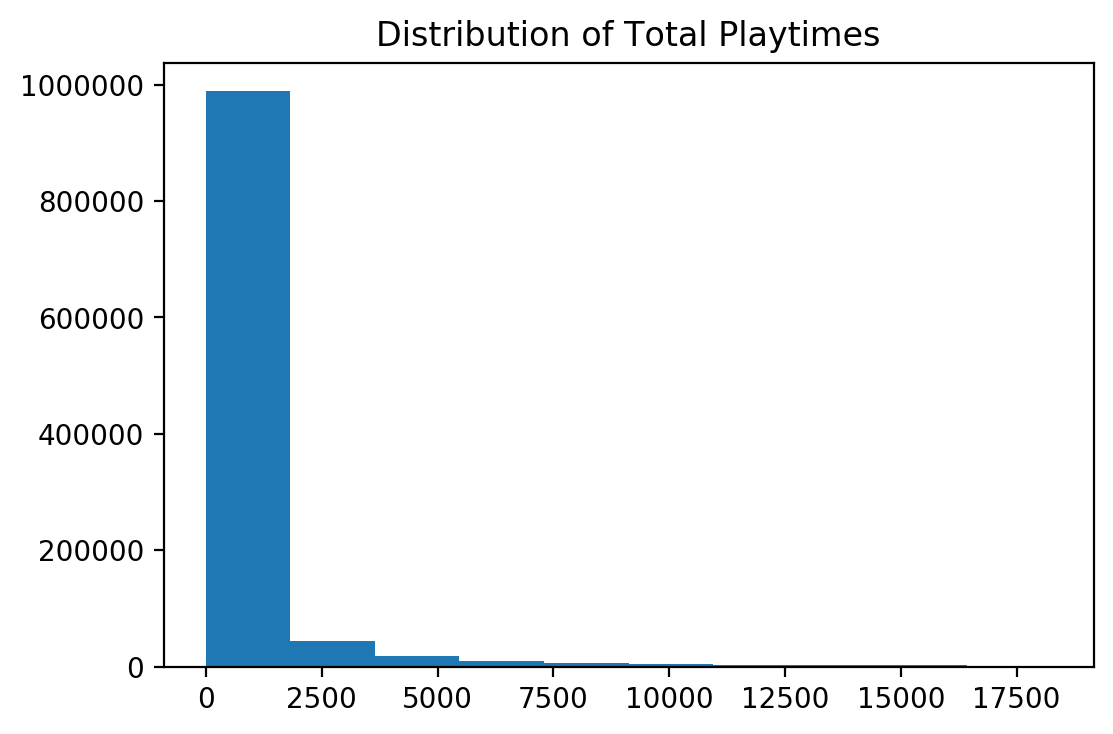

In [23]:
playtime_mean = np.average(genre_playtimes.playtime_forever.values)
playtime_std = np.std(genre_playtimes.playtime_forever.values)
playtime_upper_limit = playtime_mean + (2 * playtime_std)

outlier_filtered_playtimes = [val for val in genre_playtimes.playtime_forever.values if val < playtime_upper_limit]
plt.hist(outlier_filtered_playtimes)
plt.title("Distribution of Total Playtimes")
plt.show()

In [24]:
genre_playtime_dict = {}
for genre in set(game_genres.Genre.values):
    genre_subset = genre_playtimes.loc[genre_playtimes.Genre == genre, 'playtime_forever'].values
    genre_playtime_dict[genre] = genre_subset

In [25]:
genre_playtime_dict['Racing'].shape

(14257,)

Text(0.5, 0, 'Total Play Time [minutes]')

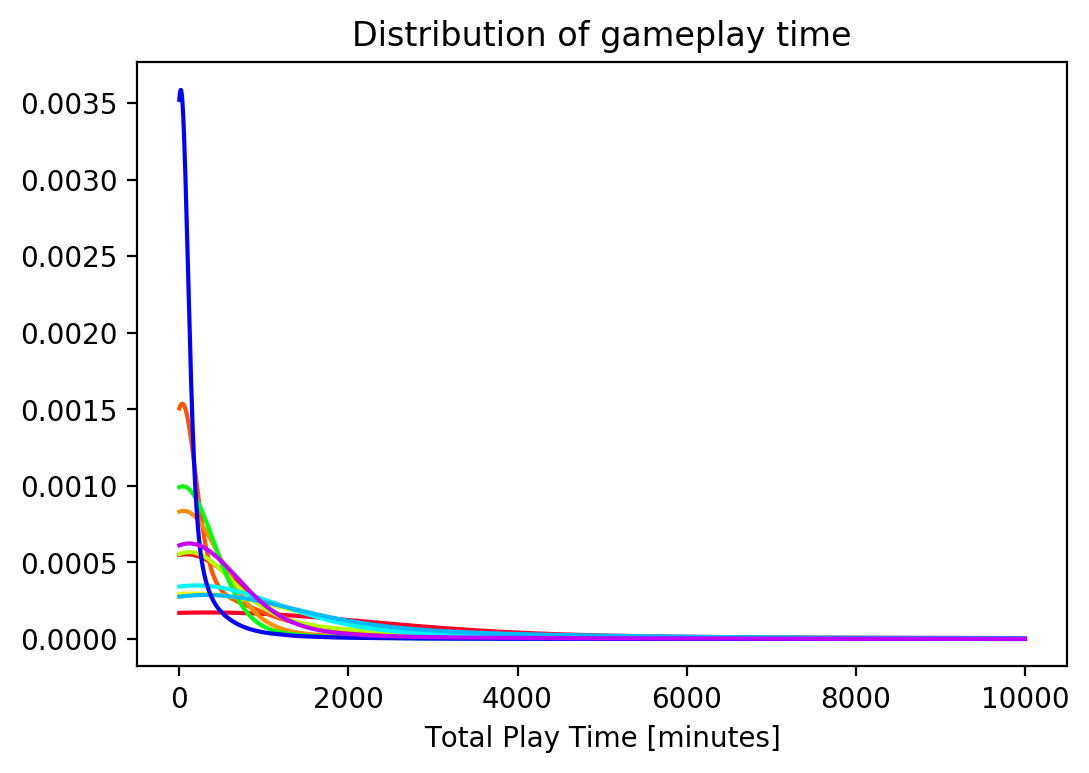

In [26]:
color_idx = 0
cm = plt.get_cmap('gist_rainbow')
num_colors = len(set(game_genres.Genre.values))
i = 0

# let's only visualize for the top 10 genres
sorted_genres = np.argsort([samples.shape[0] for samples in genre_playtime_dict.values()])[:10:-1]

for genre, samples in genre_playtime_dict.items():
    if i in sorted_genres:
        distribution_fit = gaussian_kde(samples)
        plot_range = range(10000)
        plt.plot(plot_range, distribution_fit(plot_range), color=cm(1*i/num_colors))
        i += 1
    else:
        i += 1

plt.title("Distribution of gameplay time")
plt.xlabel("Total Play Time [minutes]")

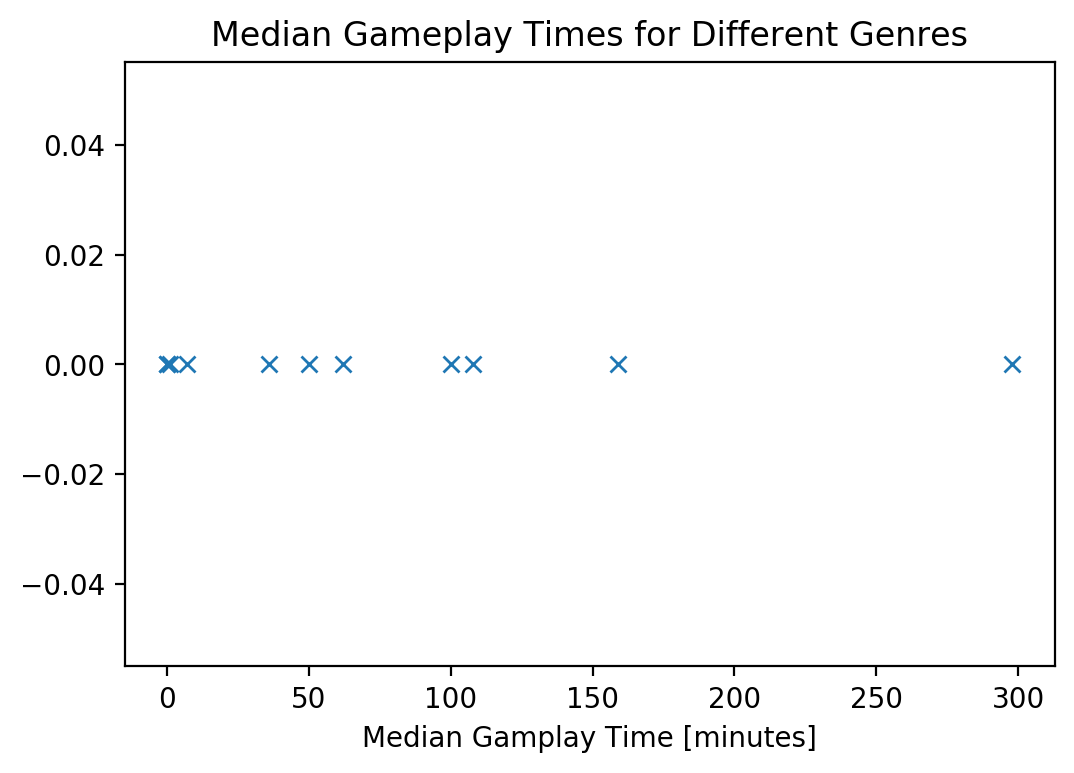

In [27]:
median_values = []
average_values = []
i = 0
for genre, samples in genre_playtime_dict.items():
    if i in sorted_genres:
        median_values.append(np.median(samples))
        average_values.append(np.average(samples))
        i += 1
    else:
        i += 1
        
plt.plot(median_values, [0 for _ in range(len(median_values))], 'x')
plt.title("Median Gameplay Times for Different Genres")
plt.xlabel("Median Gamplay Time [minutes]")
plt.show()

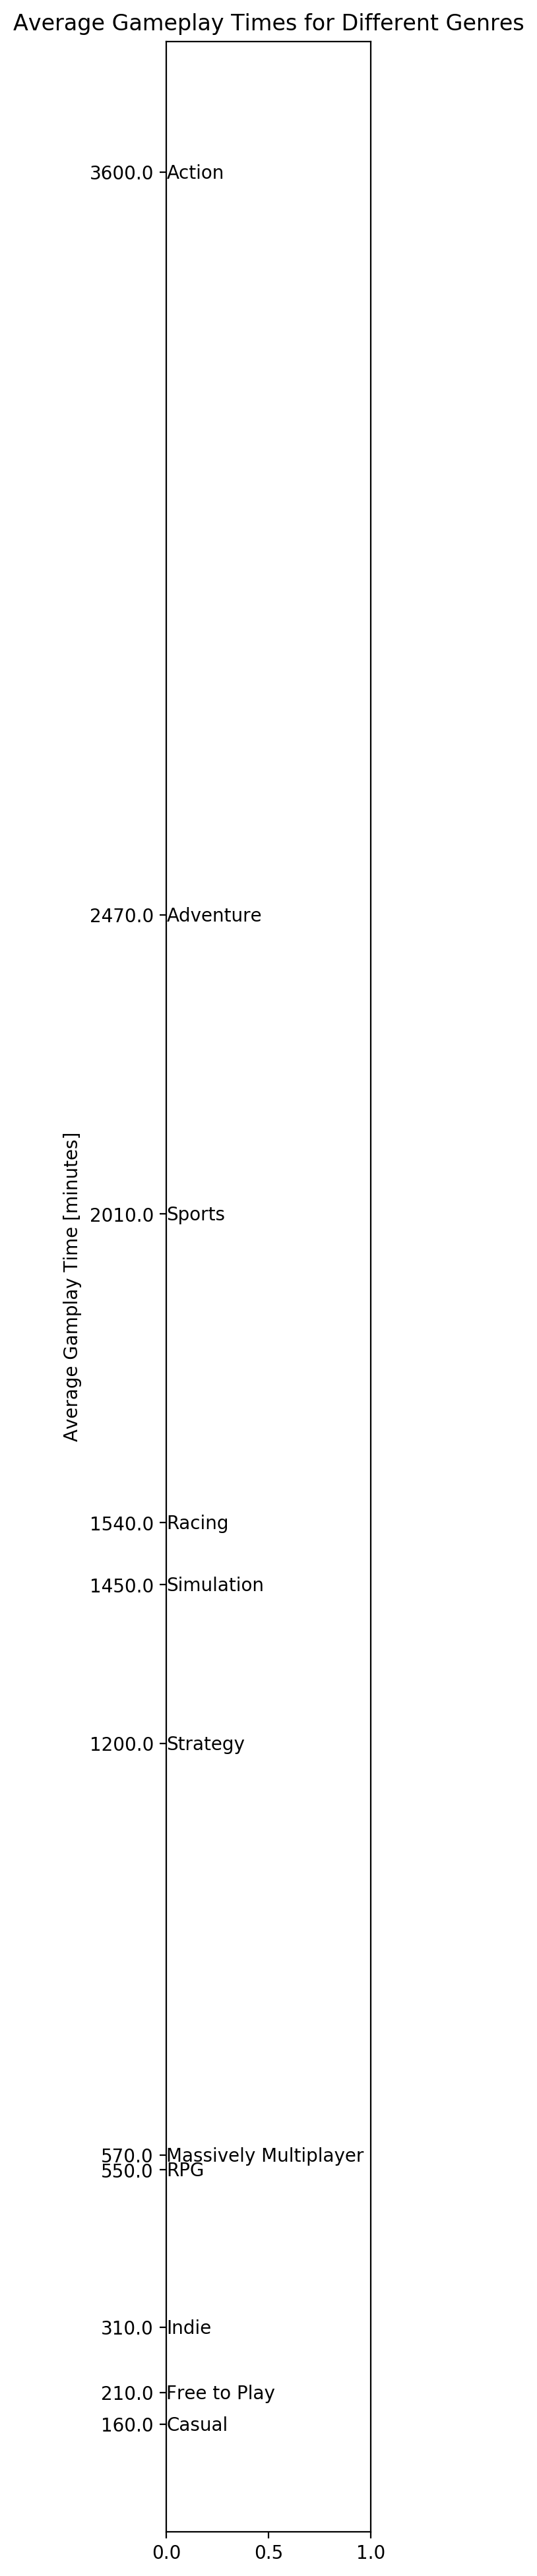

In [28]:
plt.rcParams['figure.figsize'] = (2,25)
labels = np.array([val for val in genre_playtime_dict.keys()])[sorted_genres]

for val, label in zip(average_values, labels):
    plt.text(0, val - 10, label)
plt.title("Average Gameplay Times for Different Genres")
plt.ylabel("Average Gamplay Time [minutes]")
plt.yticks(average_values, [np.round(val, -1) for val in average_values])
plt.ylim((0, max(average_values) + 200))
plt.show()

There is a huge variance in both the median and the average gampeplay time by genre, so we will use this as an input feature.

### Other variables that I am going to add to the model
<ul>
    <li>Player average gameplay time</li>
    <li>Player median gameplay time</li>
    <li>Is player's "favorite" genre</li>
    <li>Is Player's "favorite" developer</li>
</ul>

# Determining the Train-Test Split Point

To catch data leakage, we will make our test set all the datapoints after a cutoff date. Let's figure out when that cutoff date should be.

In [32]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

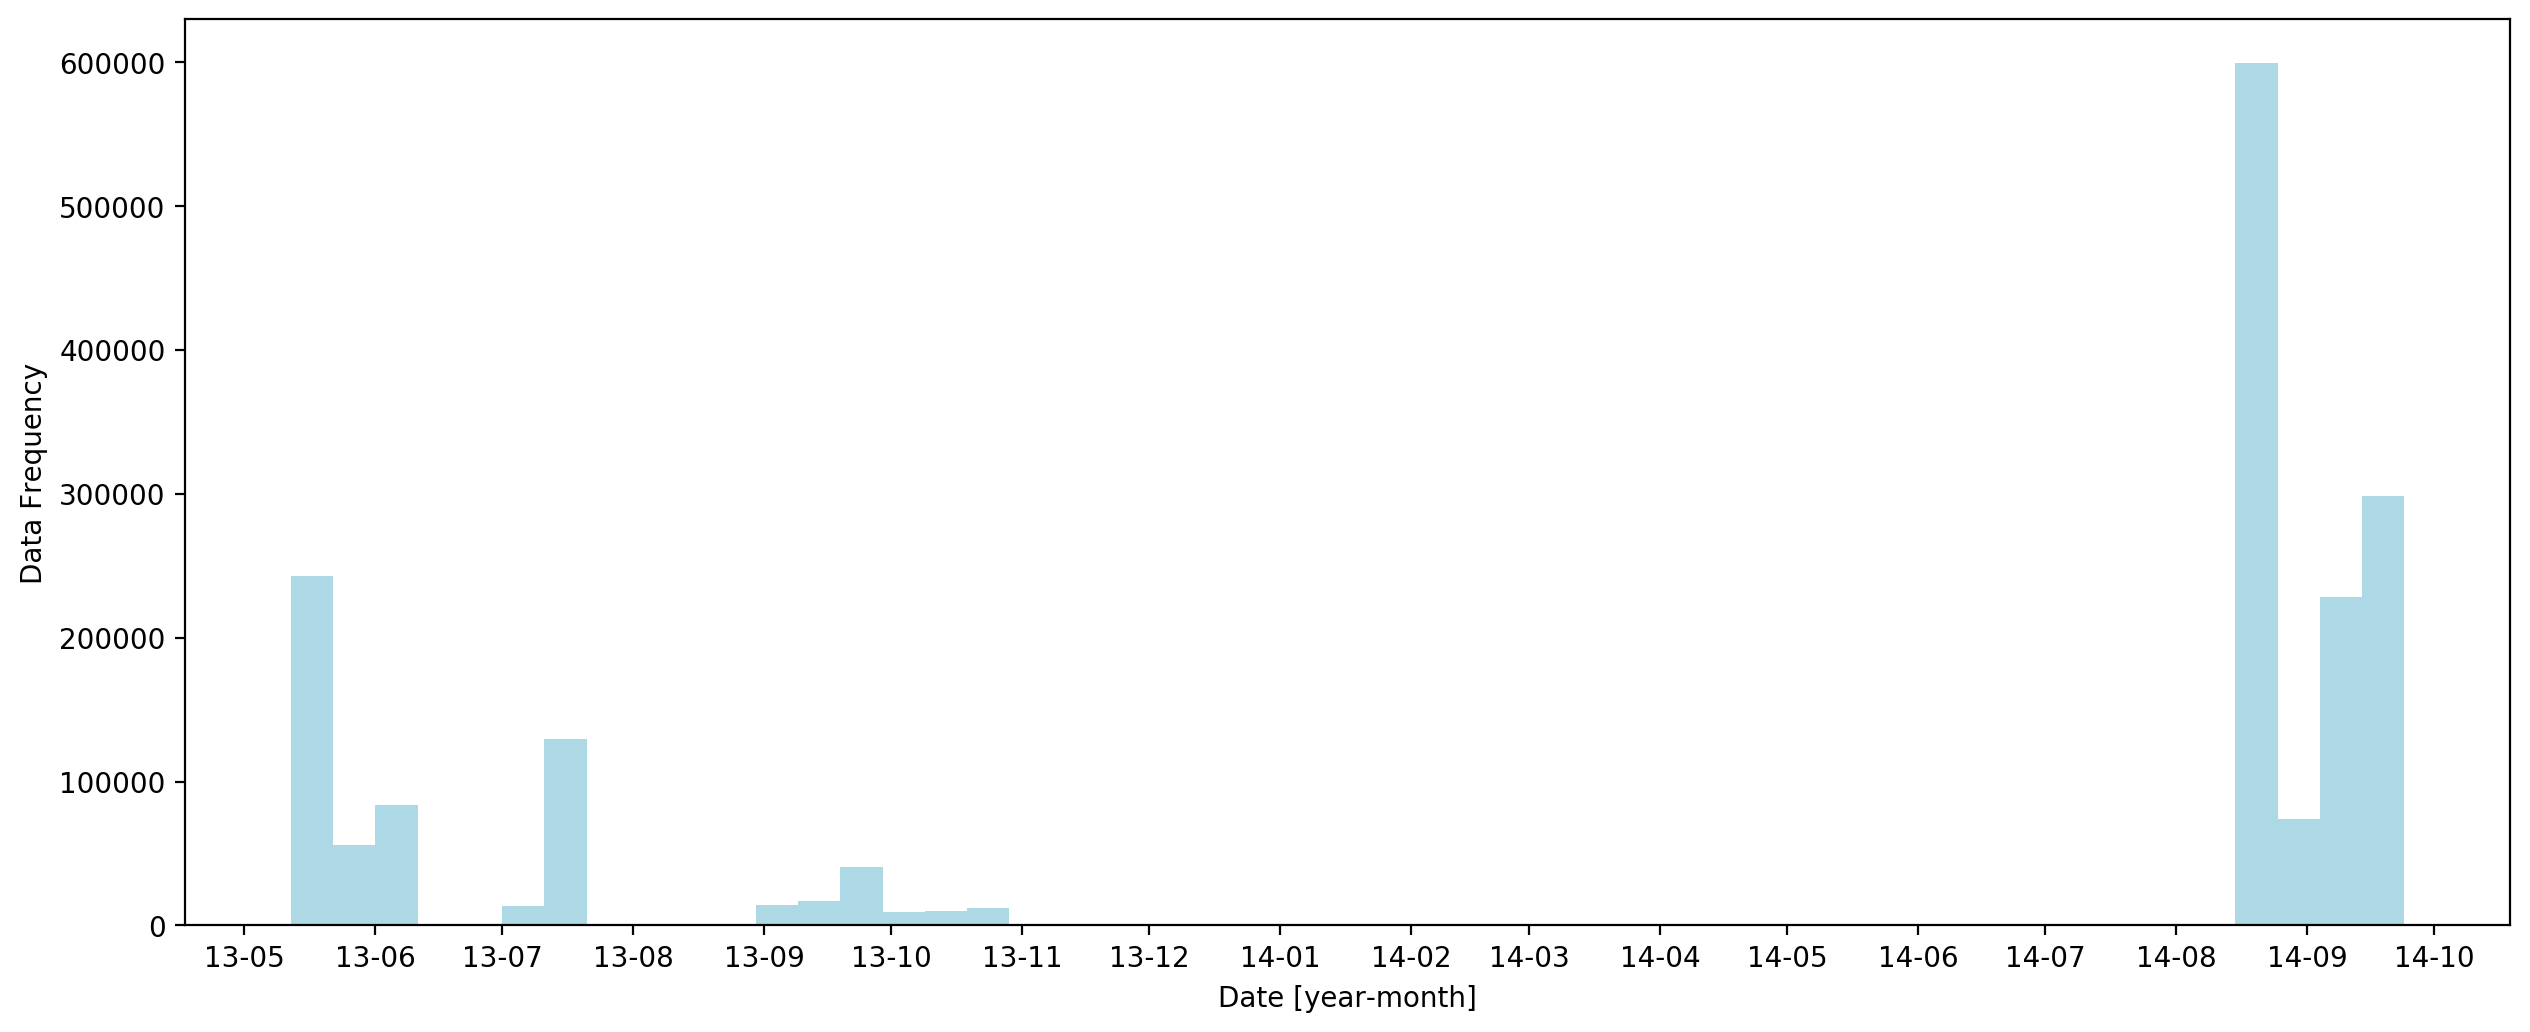

In [33]:
date_distribution = (
    all_games['dateretrieved']
    .apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d'))
).values


plt.rcParams['figure.figsize'] = (15, 6)

fig, ax = plt.subplots(1,1)
ax.hist(date_distribution, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%y-%m'))
plt.xlabel("Date [year-month]")
plt.ylabel("Data Frequency")
plt.show()

Based on this distribution, we will set the cutoff date to 2014-09-01.